In [1]:
import libpysal as lps
import numpy as np
import esda
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w = lps.weights.lat2W(4, 4)
y = np.ones(16)
y[0:8] = 0
np.random.seed(12345)
from esda.join_counts import Join_Counts
jc = Join_Counts(y, w)
jc.bb


10.0

In [3]:
jc.crosstab

Neighbor,W,B
Focal,,
W,10.0,2.0
B,2.0,10.0


In [4]:
jc.expected

Neighbor,W,B
Focal,,
W,6.0,6.0
B,6.0,6.0


In [5]:
jc.chi2

8.166666666666666

In [6]:
jc.p_sim_chi2

0.008

In [7]:
round(jc.p_sim_bb, 3)

0.003

In [8]:
np.max(jc.sim_bb)

10.0

In [9]:
np.min(jc.sim_bb)

0.0

In [10]:
jc.p_sim_bw

1.0

In [11]:
np.mean(jc.sim_bw)

12.811811811811811

In [12]:
np.max(jc.sim_bw)

24.0

In [13]:
np.min(jc.sim_bw)

7.0

In [14]:
import seaborn as sns

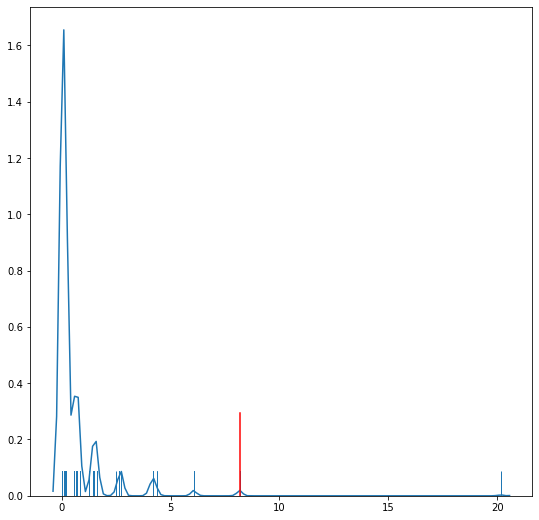

In [15]:
f, ax = plt.subplots(1, figsize=(9, 9))
sns.distplot(jc.sim_chi2, rug=True, hist=False, ax=ax)
plt.axvline(jc.chi2, 0,0.17, color='r')


Text(0.5, 1.0, 'BB Counts')

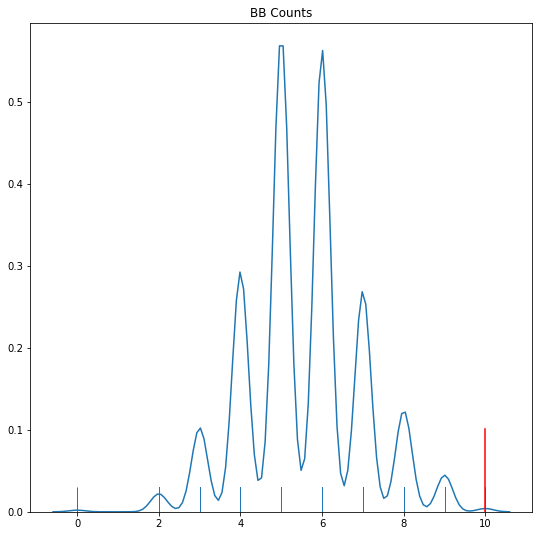

In [16]:
f, ax = plt.subplots(1, figsize=(9, 9))
sns.distplot(jc.sim_bb, rug=True, hist=False, ax=ax)
plt.axvline(jc.bb, 0,0.17, color='r')
plt.title('BB Counts')


Text(0.5, 1.0, 'WW Counts')

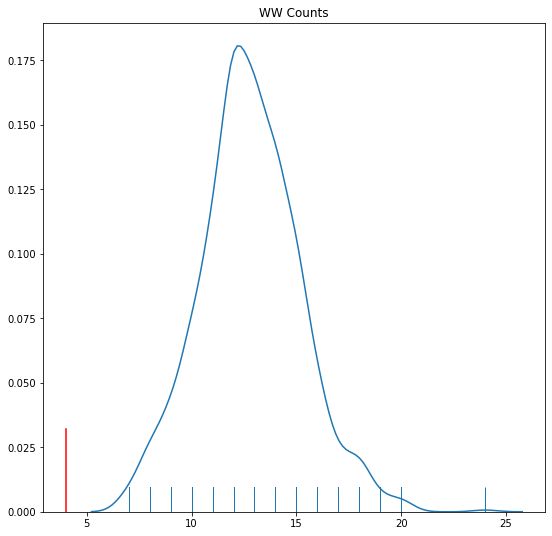

In [17]:
f, ax = plt.subplots(1, figsize=(9, 9))
sns.distplot(jc.sim_bw, rug=True, hist=False, ax=ax)
plt.axvline(jc.bw, 0,0.17, color='r')
plt.title('WW Counts')


## Handle zero cell values

In [18]:
from scipy.stats import chi2_contingency
import pandas as pd

In [19]:
table = [ [0, 1], [2, 3]]
r = chi2_contingency(table)

In [20]:
r


(0.15000000000000002, 0.6985353583033386, 1, array([[0.33333333, 0.66666667],
        [1.66666667, 3.33333333]]))

In [21]:
str(r[-1])

'[[0.33333333 0.66666667]\n [1.66666667 3.33333333]]'

In [22]:
import warnings
def calc(y, w):
    adj_list = w.to_adjlist(remove_symmetric=True)
    zseries = pd.Series(y, index=w.id_order)
    focal = zseries.loc[adj_list.focal].values
    neighbor = zseries.loc[adj_list.neighbor].values
    sim = focal == neighbor
    dif = 1 - sim
    bb = (focal * sim).sum()
    ww = ((1 - focal) * sim).sum()
    bw = (focal * dif).sum()
    wb = ((1 - focal) * dif).sum()
    table = [[ww, wb], [bw, bb]]
    print(table)
    try:
        chi2 = chi2_contingency(table)
    except ValueError:
        print('inadmissible expected counts')
        warnings.warn('Zero expected joins encountered, no inference possible.')
        return None
    stat, pvalue, dof, expected = chi2
    return (bb, ww, bw + wb, stat, pvalue, dof, expected, np.array(table))


In [23]:
w = lps.weights.lat2W(3,3)
y = np.ones((w.n,))
y[0:5] = 0
calc(y, w)

[[5.0, 2.0], [2.0, 3.0]]


(3.0,
 5.0,
 4.0,
 0.2448979591836734,
 0.6206907170753546,
 1,
 array([[4.08333333, 2.91666667],
        [2.91666667, 2.08333333]]),
 array([[5., 2.],
        [2., 3.]]))

In [24]:
w = lps.weights.lat2W(3,3)
y = np.ones((w.n,))
y[0:8] = 0
calc(y, w)

[[10.0, 2.0], [0.0, 0.0]]
inadmissible expected counts


/home/serge/anaconda3/envs/esda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Zero expected joins encountered, no inference possible.


In [25]:
jc = esda.Join_Counts(y, w)

In [26]:
jc.chi2

2.4793388429752072

In [27]:
jc

In [28]:
str(table)

'[[0, 1], [2, 3]]'

In [29]:
jc.expected

Neighbor,W,B
Focal,,
W,10.083333,0.916667
B,0.916667,0.083333


In [30]:
w.s0

24.0

In [31]:
jc.crosstab

Neighbor,W,B
Focal,,
W,10.0,1.0
B,1.0,0.0
